# Set up environment

In [55]:
# Numpy
import numpy as np
import numpy.random as rand

# Sklearn and interpolation
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from scipy.interpolate import Rbf
import umap

# Plotting
import matplotlib.pyplot as plt

# Neural Network
from keras.models import Input, Sequential
from keras.layers import Dense, Dropout
import keras.backend as K

# other utils
import glob

Import my source code

In [6]:
# Import the path of function
import sys
import importlib
sys.path.append('/local_data/notebooks/clintko/GitRepo/Proj_SingleCell/Test Func')

# Import tool of flow to image
import Tool_flow2img
importlib.reload(Tool_flow2img)
from Tool_flow2img import *

# Read in the dataset

In [8]:
data_dir = "/data/flow/EQAPOL_normal/"
files = [glob.glob(data_dir + "*" + idx_name + ".txt") 
         for idx_name in ['Costim', 'CMV_pp65', 'SEB']]
files = np.array(files)
files

array([['/data/flow/EQAPOL_normal/AMJ_5L_Costim.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_Costim.txt',
        '/data/flow/EQAPOL_normal/E6901F0T-07_Costim.txt',
        '/data/flow/EQAPOL_normal/E6901FYZ-01_Costim.txt',
        '/data/flow/EQAPOL_normal/F69018CN-01_Costim.txt',
        '/data/flow/EQAPOL_normal/F6901DJK-01_Costim.txt',
        '/data/flow/EQAPOL_normal/G6901B3H-01_Costim.txt',
        '/data/flow/EQAPOL_normal/J6901CDB-01_Costim.txt',
        '/data/flow/EQAPOL_normal/J6901HJ1-06_Costim.txt',
        '/data/flow/EQAPOL_normal/K690194C-01_Costim.txt',
        '/data/flow/EQAPOL_normal/K6901DKW-01_Costim.txt'],
       ['/data/flow/EQAPOL_normal/AMJ_5L_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/E6901F0T-07_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/E6901FYZ-01_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/F69018CN-01_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/F6901DJK-01_CMV_pp65.

get the samples from three groups

In [9]:
files_subset = np.array([
    files[0][0:2],  # COSTIM
    files[1][0:2], + # CMV
    files[2][0:2]])  # SEB
files_subset

array([['/data/flow/EQAPOL_normal/AMJ_5L_Costim.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_Costim.txt'],
       ['/data/flow/EQAPOL_normal/AMJ_5L_CMV_pp65.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_CMV_pp65.txt'],
       ['/data/flow/EQAPOL_normal/AMJ_5L_SEB.txt',
        '/data/flow/EQAPOL_normal/B6901GFJ-08_SEB.txt']], dtype='<U49')

read files

In [10]:
data_samples = [np.loadtxt(file) for group in files_subset for file in group]

# Preprocess

Raw files

In [11]:
data_samples = np.array(data_samples)
data_labels = [0, 0, 1, 1, 2, 2] # 0 = Costim, 1 = CMV, 2 = SEB

print("===== Raw Shape ======")
print(data_samples.shape)
print(data_samples[0].shape) # Costim
print(data_samples[1].shape) # Costim
print(data_samples[2].shape) # CMV
print(data_samples[3].shape) # CMV
print(data_samples[4].shape) # SEB
print(data_samples[5].shape) # SEB

===== Raw Shape ======
(6,)
(455472, 14)
(607410, 14)
(411894, 14)
(515178, 14)
(422658, 14)
(519426, 14)


standardize all the samples based on the first sample

In [12]:
data_samples_std = data_standardization(data_samples, verbose = True)

Data Standardization...
...Finish


randomly subset data points in each sample

In [13]:
print("===== 10,000 cells ======")
data_labels_sub, data_samples_sub = data_subsetting(
    data_samples_std, 
    data_labels, 
    k = 10000, 
    num_subsets = 2, 
    rand_seed   = 0,
    verbose = True)

print("===== Shape After subsetting ======")
print(data_samples_sub.shape)
print(data_samples_sub[0].shape) # Costim
print(data_samples_sub[1].shape) # Costim
print(data_samples_sub[2].shape) # Costim
print(data_samples_sub[3].shape) # Costim
print(data_samples_sub[4].shape) # CMV
print(data_samples_sub[5].shape) # CMV
print(data_samples_sub[6].shape) # CMV
print(data_samples_sub[7].shape) # CMV
print(data_samples_sub[8].shape) # SEB
print(data_samples_sub[9].shape) # SEB
print(data_samples_sub[10].shape) # SEB
print(data_samples_sub[11].shape) # SEB

===== 10,000 cells ======
Data Subsetting...
...Finish
===== Shape After subsetting ======
(12, 10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)
(10000, 14)


Generate UMAP of the pool samples

In [15]:
print("===== Dim Reduct ======\n")
data_umap_pool = create_umap_pool(data_samples_sub, verbose = True)
data_umap_pool = data_umap_pool.reshape([12, -1, 2])

print("===== UMAP Shape ======")
print(data_umap_pool.shape)

===== Dim Reduct ======

Create UMAP plots...
...Finish
===== UMAP Shape ======
(12, 10000, 2)


# Visualize the Results of Dimensional Reduction

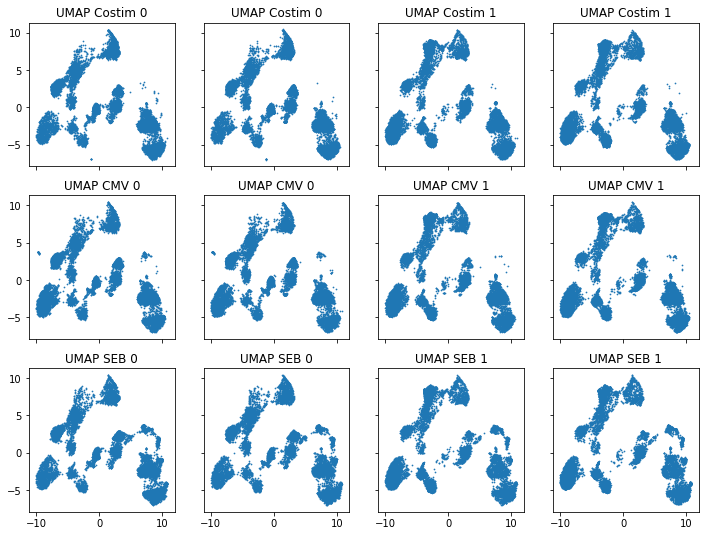

In [16]:
fig, axes = plt.subplots(figsize=(12, 9), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap_pool[idx][:, 0], 
            data_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

# Train on the three sub samples (one for each group) to approximate others (all samples are generated in Pooled UMAP)

### split the data points from three subsamples into train and test

In [97]:
# get the first sample
X      = np.vstack(data_samples_sub[[0, 4, 8]])
y_umap = np.vstack(data_umap_pool[[0, 4, 8]])

# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_umap, train_size = 0.9, random_state = 0)

/local_data/env-py3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [98]:
X_train.shape

(27000, 14)

### Construct architecture of Neural Network (NN)

**Set up an Autoencoder**    
The idea is acquired from the website [Autoencoder for Dimensionality Reduction](https://statcompute.wordpress.com/2017/01/15/autoencoder-for-dimensionality-reduction/) from [Yet Another Blog in Statistical Computing](https://statcompute.wordpress.com/)
```
#  InputLayer (None,  14) <--
#       Dense (None, 128)
#       Dense (None,  64)
#       Dense (None,  32)
#       Dense (None,  16)
#       Dense (None,   2) <--
#       Dense (None,  16)
#       Dense (None,  32)
#       Dense (None,  64)
#       Dense (None, 128)
# OutputLayer (None,  14) <--
```

In [117]:
    model = Sequential()
    model.add(Dense(128, input_shape=(14,), activation='relu'))
    model.add(Dense(64,  activation='relu'))
    model.add(Dense(32,  activation='relu'))
    model.add(Dense(16,  activation='relu'))
    model.add(Dense(2,   activation='relu'))
    model.add(Dense(32,  activation='relu'))
    model.add(Dense(16,  activation='relu'))
    model.add(Dense(64,  activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(14))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               1920      
_________________________________________________________________
dense_43 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_44 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_45 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 34        
_________________________________________________________________
dense_47 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_48 (Dense)             (None, 16)                528       
__________

train the NN

In [119]:
history = model.fit(
    X_train, X_train, 
    epochs = 100, 
    batch_size = 1000, 
    verbose = 0,                
    validation_data=(X_test, X_test))

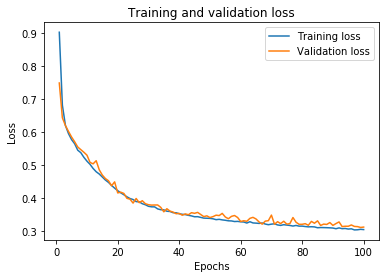

In [120]:
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss,     label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

set up encoder

In [121]:
model.input

<tf.Tensor 'dense_42_input:0' shape=(?, 14) dtype=float32>

In [122]:
model.layers

In [124]:
model.layers[4].output

<tf.Tensor 'dense_46/Relu:0' shape=(?, 2) dtype=float32>

In [125]:
XX = model.input
YY = model.layers[4].output
F = K.function([XX], [YY])
encoder = lambda X: F([X])[0]

# run the NN and visualized the results

In [126]:
encoded_out_train = encoder(X_train)
encoded_out_test = encoder(X_test)

print(encoded_out_train.shape)
print(encoded_out_test.shape)

(27000, 2)
(3000, 2)


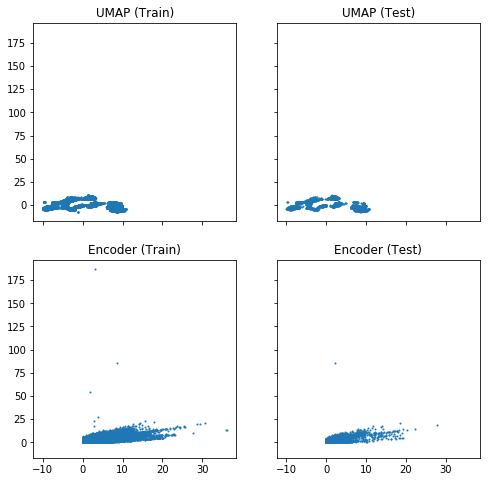

In [127]:
fig, axes = plt.subplots(figsize=(8, 8), nrows = 2, ncols = 2, sharex = True, sharey = True)
axes[0, 0].scatter(y_train[:, 0], y_train[:, 1], s = 1)
axes[0, 0].set_title('UMAP (Train)')

axes[0, 1].scatter(y_test[:, 0], y_test[:, 1], s = 1)
axes[0, 1].set_title('UMAP (Test)')

axes[1, 0].scatter(encoded_out_train[:, 0],encoded_out_train[:, 1], s = 1)
axes[1, 0].set_title('Encoder (Train)')

axes[1, 1].scatter(encoded_out_test[:, 0], encoded_out_test[:, 1], s = 1)
axes[1, 1].set_title('Encoder (Test)')

plt.show()

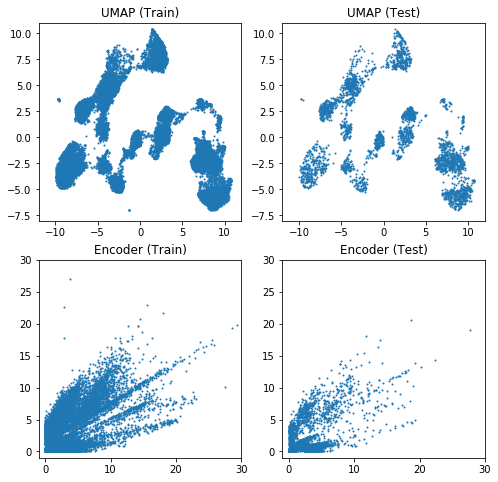

In [131]:
fig, axes = plt.subplots(figsize=(8, 8), nrows = 2, ncols = 2)
axes[0, 0].scatter(y_train[:, 0], y_train[:, 1], s = 1)
axes[0, 0].set_title('UMAP (Train)')

axes[0, 1].scatter(y_test[:, 0], y_test[:, 1], s = 1)
axes[0, 1].set_title('UMAP (Test)')

axes[1, 0].scatter(encoded_out_train[:, 0],encoded_out_train[:, 1], s = 1)
axes[1, 0].set_title('Encoder (Train)')

axes[1, 1].scatter(encoded_out_test[:, 0], encoded_out_test[:, 1], s = 1)
axes[1, 1].set_title('Encoder (Test)')


axes[0, 0].set_xlim([-12, 12]); axes[0, 0].set_ylim([-8, 11])
axes[0, 1].set_xlim([-12, 12]); axes[0, 1].set_ylim([-8, 11])
axes[1, 0].set_xlim([ -1, 30]); axes[1, 0].set_ylim([-1, 30])
axes[1, 1].set_xlim([ -1, 30]); axes[1, 1].set_ylim([-1, 30])
plt.show()

### Now lets apply the NN function to other samples and compare with UMAP

In [114]:
X = list()
for idx in range(len(data_samples_sub)):
    X.append(encoder(data_samples_sub[idx]))
    
X = np.array(X)
print(X.shape)

(12, 10000, 2)


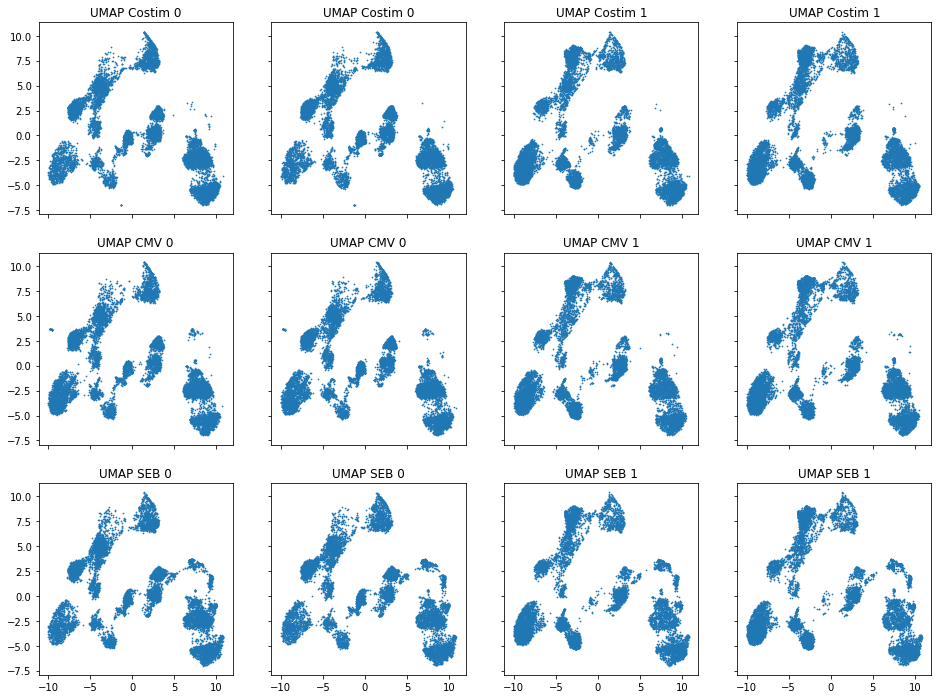

In [116]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            data_umap_pool[idx][:, 0], 
            data_umap_pool[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "UMAP " + plt_title[idx1] + " " + plt_sample[idx2])
plt.show()

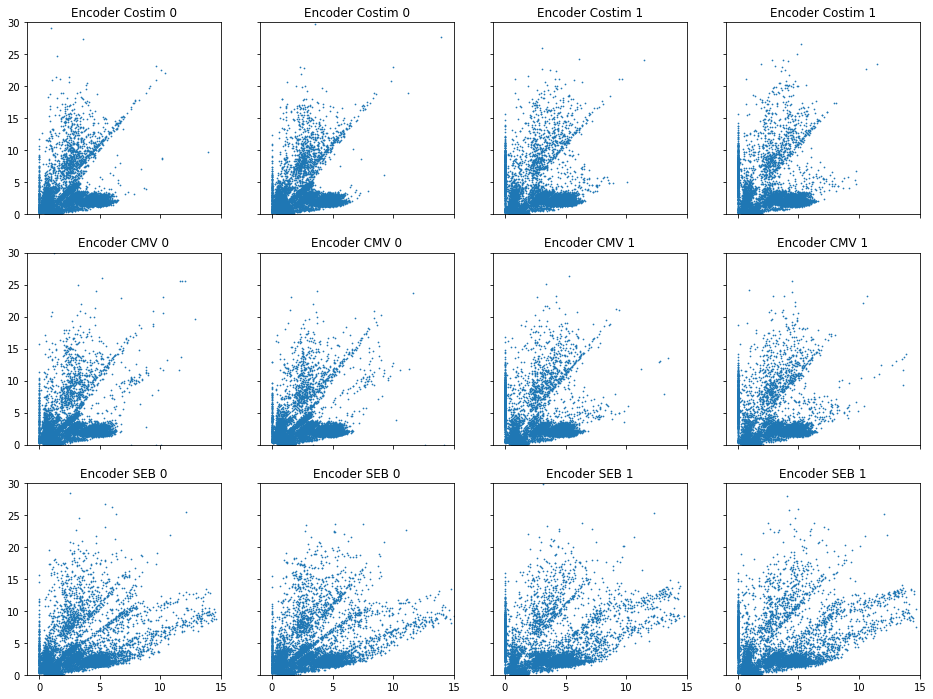

In [115]:
fig, axes = plt.subplots(figsize=(16, 12), nrows = 3, ncols = 4, sharex = True, sharey = True)
plt_title = ["Costim", "CMV", "SEB"]
plt_sample = ["0", "0", "1", "1"]

for idx1 in range(3):
    for idx2 in range(4):
        idx = idx1 * 4 + idx2
        
        axes[idx1, idx2].scatter(    
            X[idx][:, 0], 
            X[idx][:, 1],
            s = 0.5)
        
        axes[idx1, idx2].set_title(
            "Encoder " + plt_title[idx1] + " " + plt_sample[idx2])
        
axes[0, 0].set_xlim([ -1, 15]); axes[0, 0].set_ylim([ 0, 30])
plt.show()